<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/MultiRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

In [49]:
df = pd.read_csv('https://www.w3schools.com/python/data.csv')
df['Car'][0] = 'Toyota'
df

<ipython-input-49-39af7ba5f565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car'][0] = 'Toyota'


,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [39]:
x = df[['Weight', 'Volume']]  # 2 predictors
y = df['CO2']  # dependent variable

In [55]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           0.000411
Time:                        09:26:47   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.000      68.374      91.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_test = np.array([[1, 2.5, 6], [2, 3, 4], [9, 8, 5], [0, 1, 4.3]])  # "1" refers to the intercept term
model.get_prediction(X_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,79.760428,5.553583,68.461579,91.059277,63.034393,96.486464
1,159.443312,11.116211,136.827210,182.059415,133.683181,185.203443
2,717.351907,50.046684,615.531163,819.172652,614.786999,819.916815
3,0.041114,0.013082,0.014497,0.067730,-12.291647,12.373874


In [66]:
X_test = np.array([1, 2.5, 6])
model.predict(X_test)[0]

79.76042820450164

In [69]:
lm = smf.ols(formula='CO2 ~ Weight + Volume', data=df).fit()
lm.params

Intercept    79.694719
Weight        0.007551
Volume        0.007805
dtype: float64

Text(0.5, 0, 'CO2')

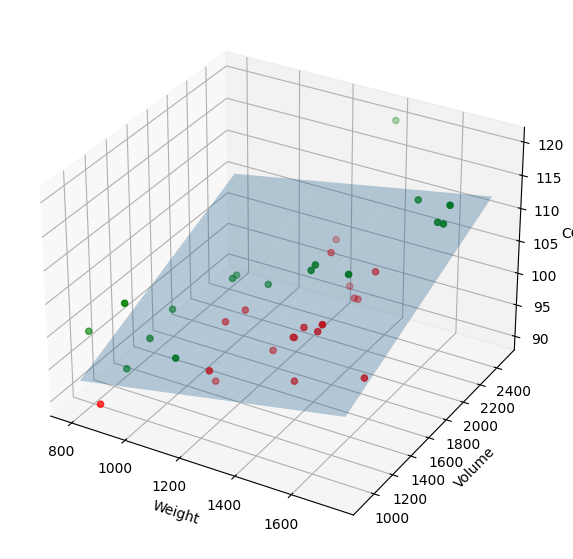

In [76]:
def f(x, y):
    return lm.params.Intercept + lm.params.Weight * x  + lm.params.Volume * y

x = df.Weight.sort_values()
y = df.Volume.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = df[df['CO2'] < f(df['Weight'], df['Volume'])]
data_above_serf = df[df['CO2'] >= f(df['Weight'], df['Volume'])]
ax.scatter(data_below_serf.Weight, data_below_serf.Volume, data_below_serf.CO2, c='r', marker='o')
ax.scatter(data_above_serf.Weight, data_above_serf.Volume, data_above_serf.CO2, c='g', marker='o')
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')